In [17]:
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split

# Ravdess

In [9]:
def get_df_from_path(path):
    files = []
    emo = []

    for dirpath, _, filenames in os.walk(path):
        for filename in tqdm(filenames):

            splits = filename.split('-')

            sound = os.path.join(dirpath, filename)

            emotion = int(splits[2])

            files.append(sound)
            emo.append(emotion)
    
    return pd.DataFrame({'sound': files, 'emotion': emo})

In [ ]:
df = get_df_from_path('../Datasets/ravdess/')

In [11]:
ds = 'ravdess'
feat_ex_technique = 'mel_chroma_mfcc_tonnetz_sc_48khz'

# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.6
ratio_val = 0.25
ratio_test = 0.15

def get_splits(d):
    # Produces test split.
    remaining, test = train_test_split(
        d, test_size=ratio_test, stratify=d['emotion'])

    # Adjusts val ratio, w.r.t. remaining dataset.
    ratio_remaining = 1 - ratio_test
    ratio_val_adjusted = ratio_val / ratio_remaining

    # Produces train and val splits.
    train, val = train_test_split(
        remaining, test_size=ratio_val_adjusted, stratify=remaining['emotion'])

    return train, val, test

In [12]:
train, val, test = get_splits(df)

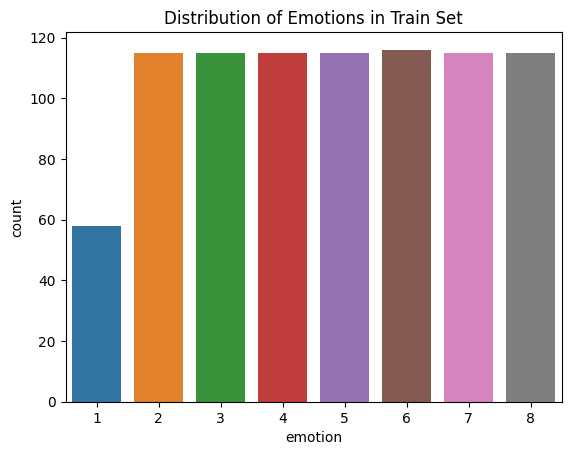

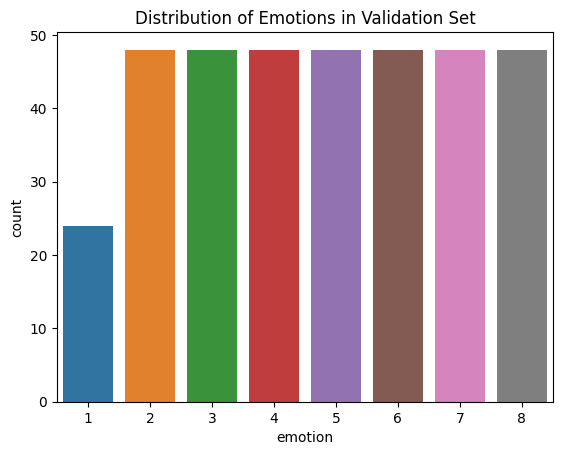

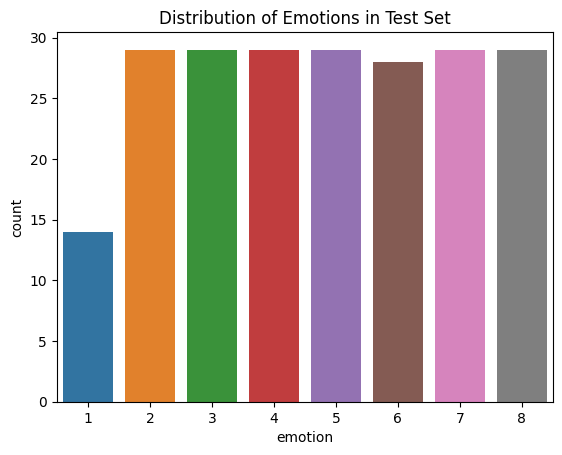

In [16]:
gm = sns.countplot(x='emotion', data=train)
gm.title.set_text('Distribution of Emotions in Train Set')
plt.show()

gm = sns.countplot(x='emotion', data=val)
gm.title.set_text('Distribution of Emotions in Validation Set')
plt.show()

gm = sns.countplot(x='emotion', data=test)
gm.title.set_text('Distribution of Emotions in Test Set')
plt.show()

In [19]:
def get_file_name(x):
    return x.split('\\')[-1]

for _, row in tqdm(train.iterrows()):
    shutil.copyfile(row['sound'], f'../Datasets/combined/train/{get_file_name(row["sound"])}')

for _, row in tqdm(val.iterrows()):
    shutil.copyfile(row['sound'], f'../Datasets/combined/val/{get_file_name(row["sound"])}')

for _, row in tqdm(test.iterrows()):
    shutil.copyfile(row['sound'], f'../Datasets/combined/test/{get_file_name(row["sound"])}')

864it [00:01, 454.50it/s]
360it [00:00, 484.33it/s]
216it [00:00, 384.42it/s]
